# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Check if we need to change directory to the project root
if os.path.basename(current_dir) == 'Scripts':
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to: {project_root}")
    sys.path.append(current_dir)
else:
    scripts_path = os.path.join(current_dir, 'Scripts')
    if os.path.exists(scripts_path):
        sys.path.append(scripts_path)

# Import modules
try:
    from preprocessing import ReviewPreprocessor
    try:
        from scraper import main as run_scraper
    except ImportError:
        from scraper import main as run_scraper
except ImportError as e:
    # Fallback logic if imports fail directly
    sys.path.append(os.getcwd())
    from preprocessing import ReviewPreprocessor
    from scraper import main as run_scraper

Current working directory: d:\mubarek\mubarek\apps\tenx\week-2


## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3223944
Total Ratings: 38785
Total Reviews: 8326

Bank of Abyssinia: Abyssinia Bank
App ID: com.boa.boaMobileBanking
Current Rating: 4.2163835
Total Ratings: 6304
Total Reviews: 1214

Dashen Bank: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.13964
Total Ratings: 3880
Total Reviews: 767

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:03<00:06,  3.31s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Abyssinia Bank


Banks:  67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:09<00:00,  3.28s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400
  Abyssinia Bank: 400

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: best...
Date: 2025-11-25 20:27:20

Rating: ⭐⭐⭐⭐⭐
Review: good app...
Date: 2025-11-25 18:10:35

Rating: ⭐
Review: it suddenly asked me to enter the verification key I received. and it (*get your verification key from the nearest CBE Branch*) Now I'm in Australia, what do you expect me to do???! There is no neares...
Date: 2025-11-25 17:14:22

Dashen Bank:
------------------------------------------------------------

Rating: ⭐
Review: What do you care about my phone's settings? Who are you to tell me what to turn off and on? It is my phone after all. This *develoler option* thing will cost you a lot of users who are willing to leav...
Date: 2025-11-25 17:03:10

Rating: ⭐⭐⭐⭐⭐
R

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,99d376ea-4824-4af9-a093-27360acc3a5c,best,5,2025-11-25 20:27:20,Nejbadin Ali,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,f1861daf-a1ed-407a-9e7c-295edbb3877d,good app,5,2025-11-25 18:10:35,Amman Mom,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,fd178fb7-7026-4d02-98a0-5c86c3bd56f5,it suddenly asked me to enter the verification...,1,2025-11-25 17:14:22,Nuredin Adem,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,571c66c6-fd18-437b-b8e5-8c443e9db2df,nice app...,5,2025-11-25 10:24:19,Abdulfeta Mifta,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,7b5b3f8c-a0f4-4a15-973a-ff5971ad15fb,very good banking service and fast service,5,2025-11-24 21:09:29,Bewektu Bekele,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [3]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 271 (22.58%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-09-26 to 2025-11-25

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1200

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Abyssinia Bank: 400
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 735 (61.3%)
  ⭐⭐⭐⭐: 89 (7.4%)
  ⭐⭐⭐: 67 (5.6%)
  ⭐⭐: 45 (3.8%)
  ⭐: 264 (22.0%)

Date range: 2024-09-26 to 2025-11-25

Text statisti

## 3. Visualizations

Let's explore the cleaned data.

C:\Users\mubar\AppData\Local\Temp\ipykernel_19588\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\mubar\AppData\Local\Temp\ipykernel_19588\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


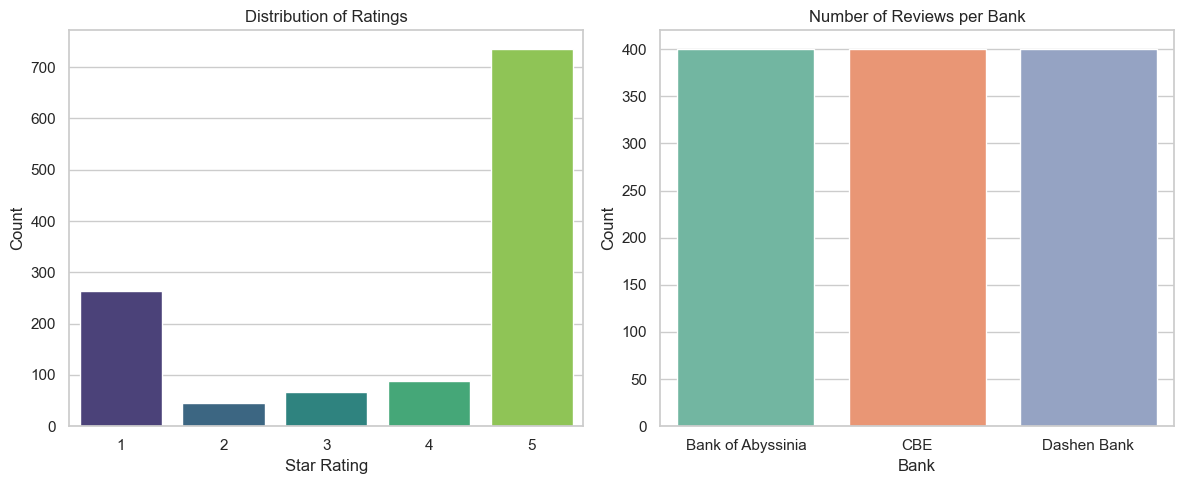

In [4]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

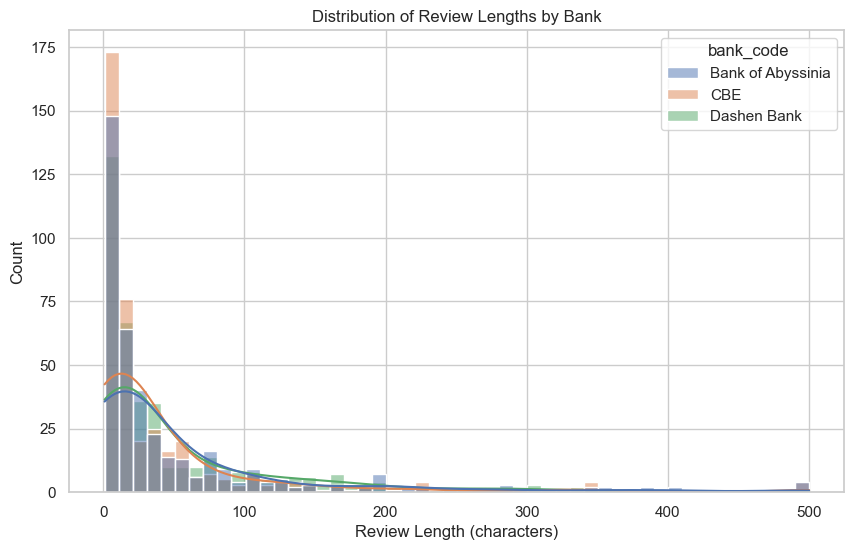

In [5]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()